#  IRIS FLOWER CLASSIFICATION  
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now we assume that we have the measurements of the iris flowers according to their species, and here my task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

## Objective  
The objective of this project is to train a machine learning model that can learn from the measurements of the iris species and classify them.

## Elaborating the process  
There are many ML algorithms for the classifcation of iris dataset. So, I will try to train several ML models and find the best model for the task. I have chosen some renowened ML models. Such as, K-NearestNeighbour, SupportVectorClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, MultinomialNaiveBayes, CatBoostClassifier, XGBoostClassifier, MLPClassifier. After training these models I will chose the best bodel based on the performance.

## The process:

### Importing libraries required for the project  
I need several python libraries for my classification task. So, I need to import them. I have imported all the required libraries in one Notebook cell.

In [1]:
# !pip install numpy pandas plotly matplotlib seaborn scikit-learn pyreadstat imbalanced-learn tabulate catboost xgboost
import numpy as np
import pandas  as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


### Importing the data  
I have downloaded the dataset in my local machine and will perform the task from my local machine.

In [2]:
data = pd.read_csv(r"C:\Users\dsaky\OneDrive\Desktop\Oasis Infobyte\Project 1\Iris.csv",index_col= "Id")
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


Here, we can see 5 columns (excluding id). We will use 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' for predicting the 'Species'

### Missing values handling 
Missing values may mislead our results in some cases. So, I will identify missing values and remove them if there is any.

In [3]:
# Checking missing values in dataset
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

I have found no missing values in the dataset. So I will proceed for further analysis.

### Exploring the data
Before any ML model building it is needed to explore and understand the data. So, I will perform several exploratory analysis on the dataset.

#### Datatypes
First I will start with the datatypes in each of the columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#### Data Summary

In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### The skewness and kurtosis in the first 4 columns

In [7]:
data.iloc[:, :4].skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [8]:
data.iloc[:, :4].kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

#### The correaltions among the predictors
The correlation may provide useful information about dependentness of the predectors.

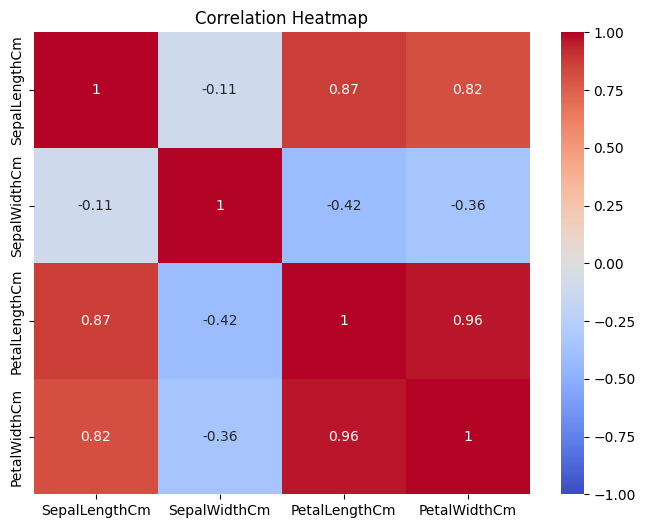

In [9]:
corr_matrix = data.iloc[:, :4].corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Here, I found there is a strong correlation among 'PetalLengthCm' and 'PetalWidthCm'.  
Lets, plot this using a scatter plot.

#### Scatter plot

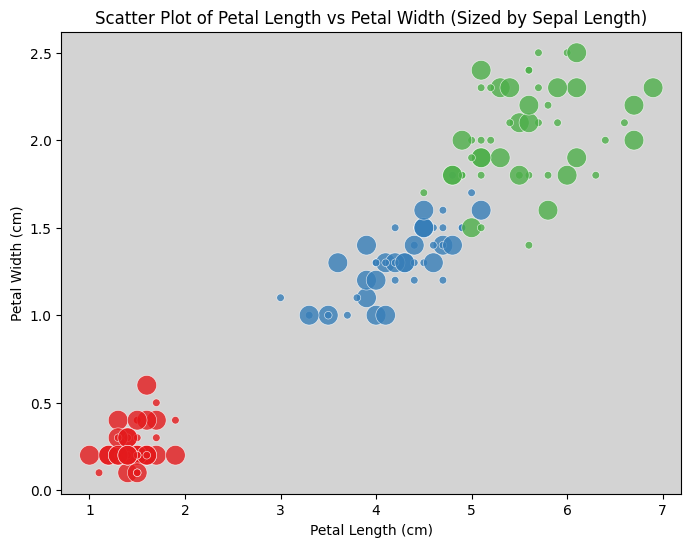

In [10]:
# Create a scatter plot with species colored by petal length and width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', size='SepalLengthCm', sizes=[30,200], data=data, alpha=0.8, palette='Set1')

# Set plot labels and title
plt.title('Scatter Plot of Petal Length vs Petal Width (Sized by Sepal Length)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.gca().set_facecolor('lightgray')
plt.gca().legend_.remove()
# Show the plot
plt.show()

This concludes my exploratory analysis of the dataset. Now, I will proceed for preprocessing of my data for training ML models.

### Pre-processing for training models
Some preprocessing is required for training ML models like Encoding, Scaling, Spliting.

#### Encoding
Encoding is needed for 'Species' column. So that, I can input it in ML models.

In [11]:
df = pd.DataFrame(data)
df['Species_encoded'] = LabelEncoder().fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Spliting
I need to split the data for training and testing. The training data will be used for training the models and the test data will be used for evaluating the performance of the models. I have taken a ratio of 75/25 for training and testing.

In [12]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 35)

Lets, view the train and test data at a glance.

In [13]:
print("The train dataset: \n")
print(pd.merge(x_train, y_train, on='Id', how='outer').head())
print("\n\n")
print("The test dataset: \n")
print(pd.merge(x_test, y_test, on='Id', how='outer').head())

The train dataset: 

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species_encoded
Id                                                                            
116            6.4           3.2            5.3           2.3                2
120            6.0           2.2            5.0           1.5                2
99             5.1           2.5            3.0           1.1                1
47             5.1           3.8            1.6           0.2                0
35             4.9           3.1            1.5           0.1                0



The test dataset: 

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species_encoded
Id                                                                            
96             5.7           3.0            4.2           1.2                1
62             5.9           3.0            4.2           1.5                1
129            6.4           2.8            5.6           2.1                2
73      

Now, lets see the shape of these datasets.

In [14]:
print(f"Shape of Training dataset: x: {x_train.shape} and y: {y_train.shape}")
print(f"Shape of testing dataset: x: {x_test.shape} and y: {y_test.shape}")

Shape of Training dataset: x: (112, 4) and y: (112,)
Shape of testing dataset: x: (38, 4) and y: (38,)


#### Scaling
I will scale the predictors of the training and test datasets individually. As, scaling together may have possiblity of data leakage. I will use standardscaler for this purpose.


In [15]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform x_train using StandardScaler
x_train_scaled = scaler.fit_transform(x_train)

# Fit and transform x_test using StandardScaler
x_test_scaled = scaler.fit_transform(x_test)

### Model Building
I will train several models in this section.

In [16]:
# initialize model
classifiers = [
KNeighborsClassifier(),
SVC(),
DecisionTreeClassifier(),
RandomForestClassifier(),
AdaBoostClassifier(),
GradientBoostingClassifier(),
ExtraTreesClassifier(),
CatBoostClassifier(logging_level='Silent'),
XGBClassifier(),
MLPClassifier()
]

In [17]:
def perform_cross_validation(classifiers, X_train, y_train, X_test, y_test,cv_splits=5):
    results = []
    for clf in classifiers:
        # print(clf)
        # Create a cross-validation object with the specified number of splits
        cv = StratifiedKFold(n_splits=cv_splits)
        # Perform cross-validation using cross_val_score
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
        # Calculate the average accuracy across all folds
        average_accuracy = scores.mean()
        # Fit the classifier on the full training data
        clf.fit(X_train, y_train)
        # Make predictions on the test data
        y_pred = clf.predict(X_test)

        # Compute accuracy score on test data
        accuracy_test = accuracy_score(y_test, y_pred)
        # Append results to the list
        results.append([type(clf).__name__, average_accuracy, accuracy_test])
    # Sort results based on test data accuracy in descending order
    results.sort(key=lambda x: x[2], reverse=True)
    # Create the table headers
    headers = ['Classifier', 'Cross-Validation Accuracy', 'Test Data Accuracy']
    # Print the results table
    print(tabulate(results, headers=headers, floatfmt=".4f"))
    return results


In [18]:
# Call the perform_cross_validation function
results = perform_cross_validation(classifiers, x_train_scaled, y_train, x_test_scaled, y_test, cv_splits=5)


Classifier                    Cross-Validation Accuracy    Test Data Accuracy
--------------------------  ---------------------------  --------------------
KNeighborsClassifier                             0.9462                0.9737
SVC                                              0.9648                0.9474
ExtraTreesClassifier                             0.9648                0.9474
XGBClassifier                                    0.9372                0.9474
DecisionTreeClassifier                           0.9557                0.9211
RandomForestClassifier                           0.9557                0.9211
AdaBoostClassifier                               0.9644                0.9211
GradientBoostingClassifier                       0.9557                0.9211
CatBoostClassifier                               0.9557                0.9211
MLPClassifier                                    0.9375                0.9211


Based on test data accuracy and cross-validation accuracy I will take best 3 models for hyper parameter tuning and will see if i canincrease the accuracy. The models I chose are: KNeighborsClassifier, SVC, RandomForestClassifier

### Hyperparameter tuning

In [19]:
# Create the classifiers
knn_classifier = KNeighborsClassifier()
sv_classifier = SVC()
random_forest_classifier = RandomForestClassifier()

In [20]:
knn_param_grid = {'n_neighbors': sp_randint(1, 10),
                  'weights': ['uniform', 'distance']}

random_forest_param_grid = {'n_estimators': sp_randint(50, 200),
                            'max_features': sp_randint(1, len(x_train_scaled[0])),
                            'min_samples_split': sp_randint(2, 11)}

svc_param_grid = {'C': [0.1, 1, 10, 100],              
                'gamma': [1, 0.1, 0.01, 0.001],       
                'kernel': ['rbf', 'linear', 'poly']}

#### KNN Model Hyper parameter tuning

In [21]:
# K-Nearest Neighbors
knn_random_search = RandomizedSearchCV(estimator=knn_classifier,
                                       param_distributions=knn_param_grid,
                                       n_iter=10,
                                       scoring='accuracy',
                                       cv=5,
                                       random_state=42)
knn_random_search.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F445203FD0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [22]:
print("Best Parameters:", knn_random_search.best_params_)
print("Best Cross-validation Accuracy:", knn_random_search.best_score_)

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Cross-validation Accuracy: 0.9644268774703558


K-Nearest Neighbors Accuracy: 0.9736842105263158


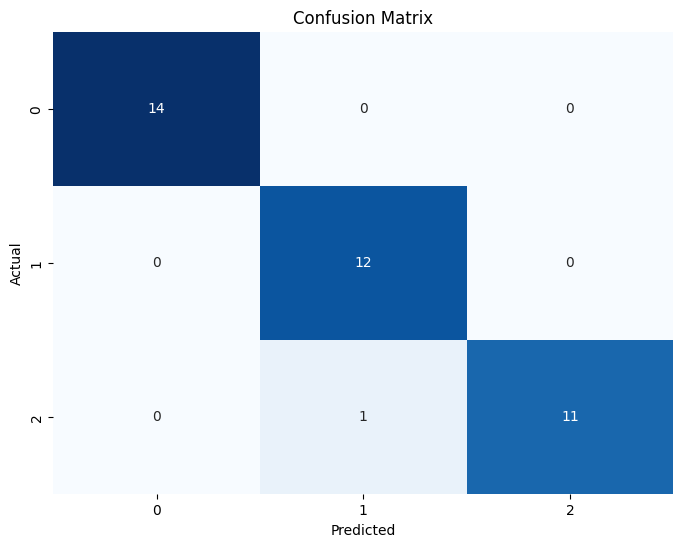


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [23]:
# K-Nearest Neighbors
knn_best_model = knn_random_search.best_estimator_
knn_y_pred = knn_best_model.predict(x_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

conf_matrix = confusion_matrix(y_test, knn_y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, knn_y_pred)
print("\nClassification Report:")
print(class_report)

#### SVC Model Hyperparameter tuning

In [24]:
# SVC
svc_random_search = RandomizedSearchCV(estimator=sv_classifier,
                                       param_distributions=svc_param_grid,
                                       n_iter=10,
                                       scoring='accuracy',
                                       cv=5,
                                       random_state=42)
svc_random_search.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   random_state=42, scoring='accuracy')

In [25]:
print("Best Parameters:", svc_random_search.best_params_)
print("Best Cross-validation Accuracy:", svc_random_search.best_score_)

Best Parameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
Best Cross-validation Accuracy: 0.982213438735178


Support Vector Classifier Accuracy: 0.9473684210526315


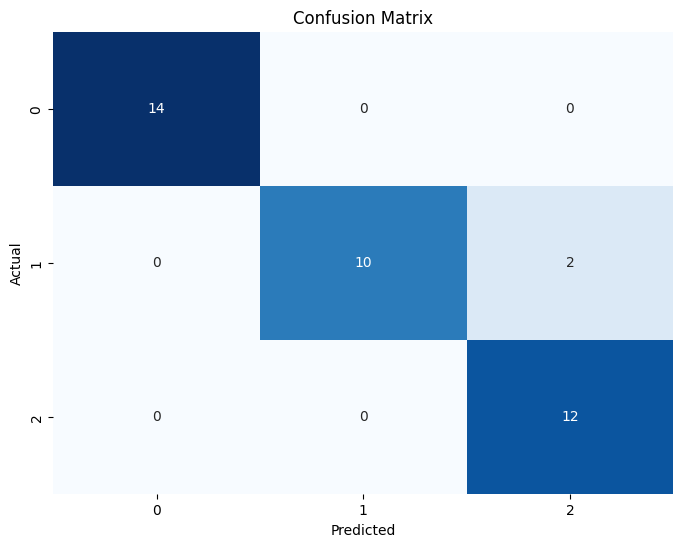


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [26]:
# SVC
svc_best_model = svc_random_search.best_estimator_
svc_y_pred = svc_best_model.predict(x_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print("Support Vector Classifier Accuracy:", svc_accuracy)

conf_matrix = confusion_matrix(y_test, svc_y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, svc_y_pred)
print("\nClassification Report:")
print(class_report)

#### RF Model Hyperparameter tuning

In [27]:
# Random Forest
random_forest_random_search = RandomizedSearchCV(estimator=random_forest_classifier,
                                                 param_distributions=random_forest_param_grid,
                                                 n_iter=10,
                                                 scoring='accuracy',
                                                 cv=5,
                                                 random_state=42)
random_forest_random_search.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F445254850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F445271650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F444FFD390>},
                   random_state=42, scoring='accuracy')

In [28]:
print("Best Parameters:", random_forest_random_search.best_params_)
print("Best Cross-validation Accuracy:", random_forest_random_search.best_score_)

Best Parameters: {'max_features': 3, 'min_samples_split': 9, 'n_estimators': 70}
Best Cross-validation Accuracy: 0.9648221343873518


Random Forest Accuracy: 0.9473684210526315


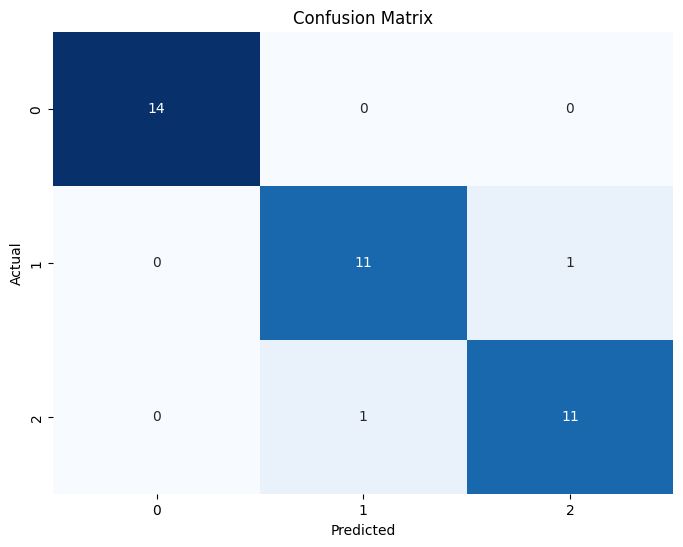


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [29]:
# Random Forest
random_forest_best_model = random_forest_random_search.best_estimator_
random_forest_y_pred = random_forest_best_model.predict(x_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
print("Random Forest Accuracy:", random_forest_accuracy)

conf_matrix = confusion_matrix(y_test, random_forest_y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, random_forest_y_pred)
print("\nClassification Report:")
print(class_report)

### Conclusion
Thus, I have achieved the maximum accuracy with the K-Nearest Neighbors classifier. So, K-Nearest Neighbors is model to clasify the "Species" of the iris dataset. It will Predict 97% accurately.